In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression

In [2]:
# source : https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand

In [3]:
dataset_cols = ["bike_count", "hour", "temp", "humidity", "wind", "visibility", "dew_pt_temp", "radiation", "rain", "snow", "functional"]
df = pd.read_csv("SeoulBikeData.csv").drop(["Date","Holiday" , "Seasons"] , axis = 1)

In [4]:
df.columns = dataset_cols
df["functional"] = (df["functional"] == "Yes").astype(int)
df = df[df["hour"] == 12]
df= df.drop(["hour"], axis =1)

In [5]:
df.head()

,bike_count,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1


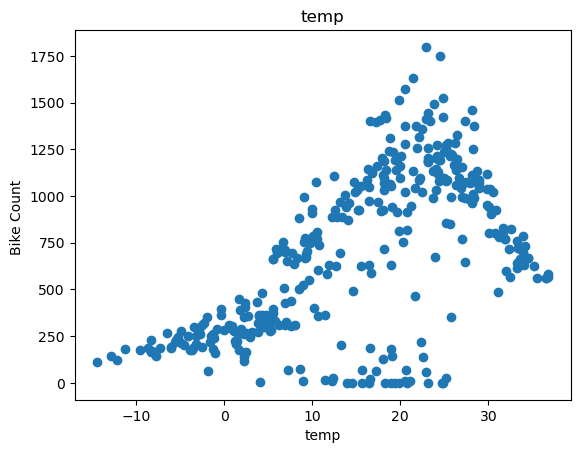

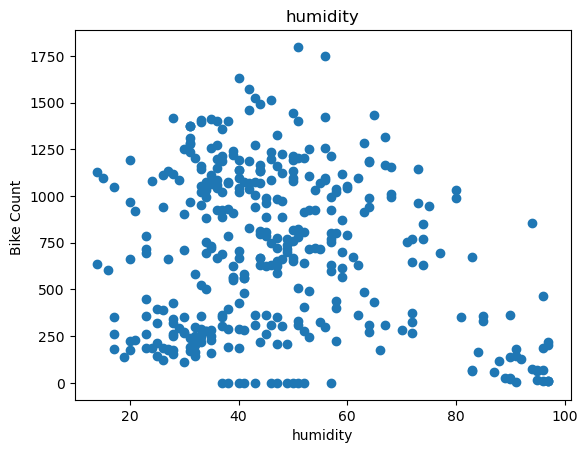

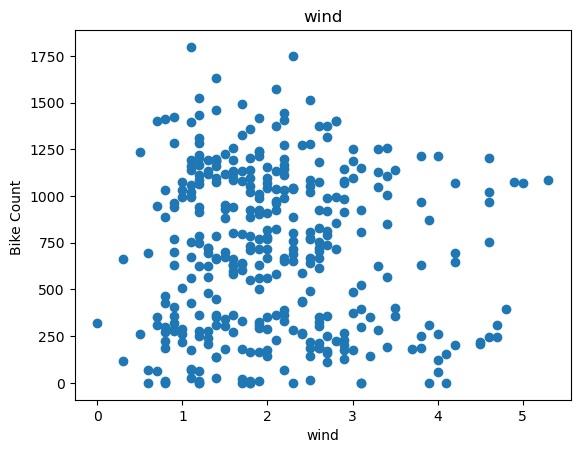

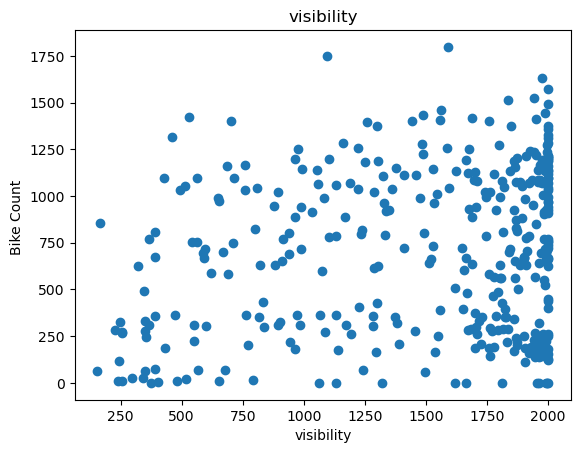

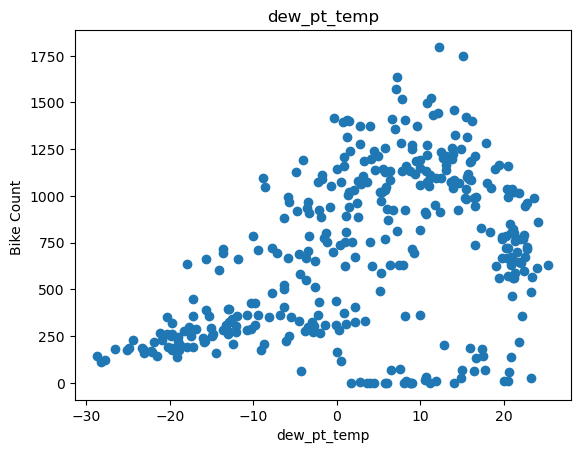

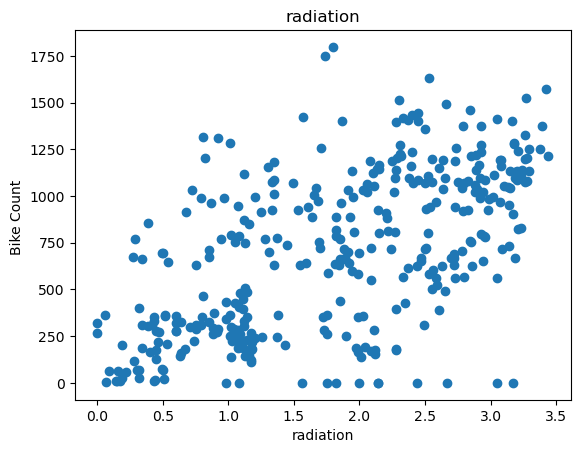

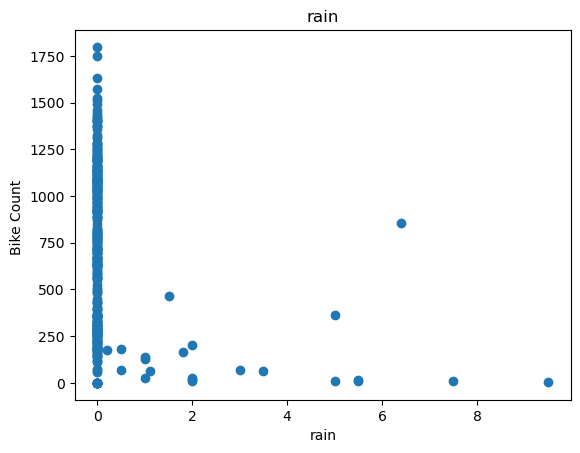

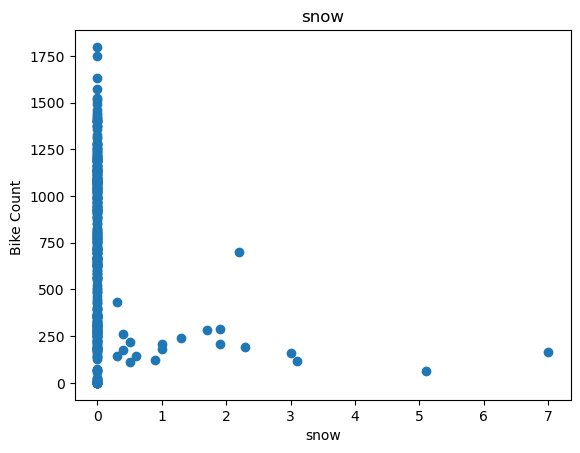

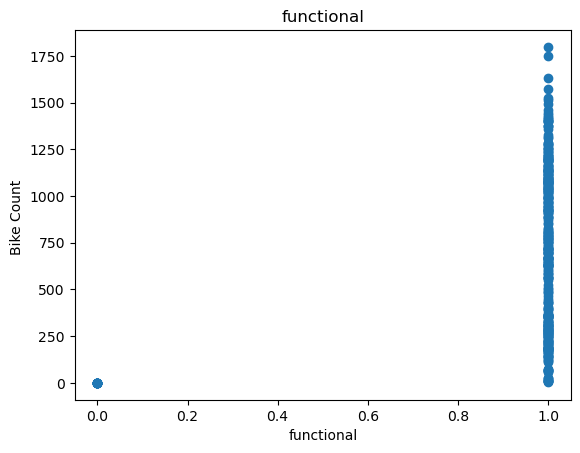

In [6]:
for label in df.columns[1:]:
    plt.scatter(df[label],df["bike_count"])
    plt.title(label)
    plt.ylabel("Bike Count ")
    plt.xlabel(label)
    plt.show()

In [7]:
df = df.drop(["wind", "visibility" , "functional"], axis =1)

In [8]:
df.head()

,bike_count,temp,humidity,dew_pt_temp,radiation,rain,snow
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0


In [9]:
train , val , test = np.split(df.sample(frac=1), [int(0.6*len(df)) , int(0.8*len(df))])

C:\Users\Dell\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [10]:
def get_xy(dataframe, y_label, x_labels= None):
    dataframe = copy.deepcopy(dataframe)
    if  x_labels is None:
        X= dataframe[[c for c in dataframe.columns if c!=y_label]].values

    else :
        if len(x_labels) == 1:
            X = dataframe[x_labels[0]].values.reshape(-1,1)
        else :
            X = dataframe[x_labels].values

    y = dataframe[y_label].values.reshape(-1,1)
    data = np.hstack((X,y))
    return data, X ,y

    

In [11]:
_,X_train_temp ,y_train_temp = get_xy(train, "bike_count", x_labels = ["temp"])
_,X_val_temp ,y_val_temp = get_xy(val, "bike_count", x_labels = ["temp"])
_,X_test_temp ,y_test_temp = get_xy(test, "bike_count", x_labels = ["temp"])

In [12]:
temp_reg = LinearRegression()
temp_reg.fit(X_train_temp , y_train_temp)


LinearRegression()

In [13]:
temp_reg.score(X_test_temp , y_test_temp)

0.3244173118649043

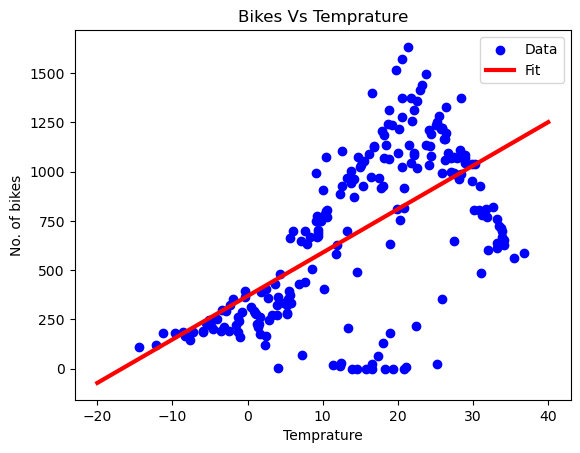

In [14]:
plt.scatter(X_train_temp ,y_train_temp , label ="Data" , color ="blue")
x = tf.linspace(-20 , 40 ,100)
plt.plot(x , temp_reg.predict(np.array(x).reshape(-1,1)) , label ="Fit", color ="red" , linewidth=3)
plt.legend()
plt.title("Bikes Vs Temprature")
plt.xlabel("Temprature")
plt.ylabel("No. of bikes")
plt.show()

In [15]:
train , val , test = np.split(df.sample(frac=1), [int(0.6*len(df)) , int(0.8*len(df))])
_,X_train_all ,y_train_all = get_xy(train, "bike_count", x_labels = df.columns[1:])
_,X_val_all ,y_val_all = get_xy(val, "bike_count", x_labels = df.columns[1:])
_,X_test_all ,y_test_all = get_xy(test, "bike_count", x_labels = df.columns[1:])

C:\Users\Dell\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [16]:
all_reg =  LinearRegression()
all_reg.fit(X_train_all ,y_train_all)

LinearRegression()

In [17]:
all_reg.score(X_test_all,y_test_all)

0.3730947283942184

In [18]:
def plot_history(history):
    plt.plot(history.history['loss'] , label= 'loss')
    plt.plot(history.history['val_loss'] , label= 'val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.legend()
    plt.grid(True)
    plt.show()
    

In [19]:
input_shape = (1,1)
temp_normalizer = tf.keras.layers.Normalization(axis=None)
temp_normalizer.adapt(X_train_temp.reshape(-1))

In [20]:

temp_nn_model = tf.keras.models.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(1)
])


In [21]:
temp_nn_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.1), loss = 'mean_squared_error')

In [22]:
history = temp_nn_model.fit(
    X_train_temp.reshape(-1,1) , y_train_temp,
    verbose =0 ,
    epochs =1000,
    validation_data = (X_val_temp , y_val_temp)
)

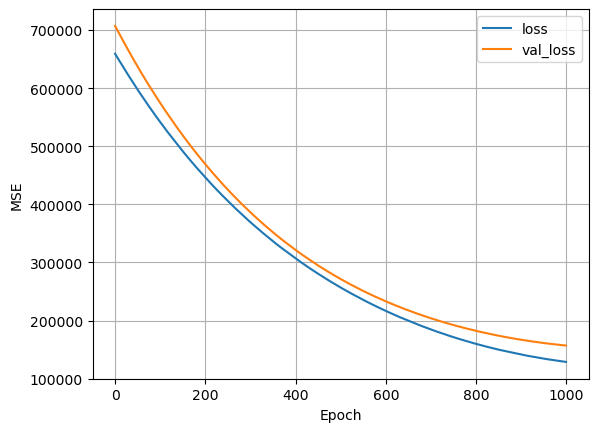

In [23]:
plot_history(history)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


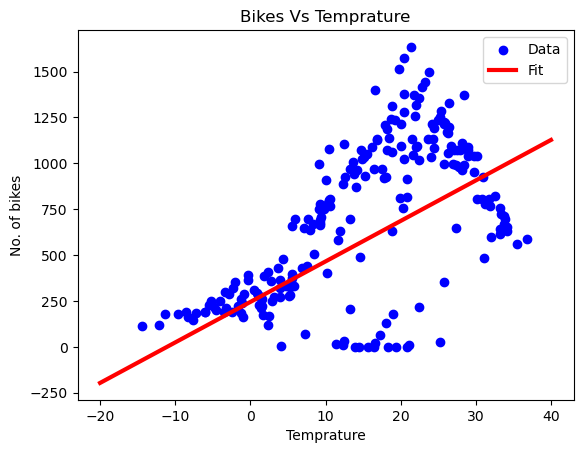

In [24]:
plt.scatter(X_train_temp ,y_train_temp , label ="Data" , color ="blue")
x = tf.linspace(-20 , 40 ,100)
plt.plot(x , temp_nn_model.predict(np.array(x).reshape(-1,1)) , label ="Fit", color ="red" , linewidth=3)
plt.legend()
plt.title("Bikes Vs Temprature")
plt.xlabel("Temprature")
plt.ylabel("No. of bikes")
plt.show()

In [25]:
#NEURAL NETWORK

In [26]:
nn_model = tf.keras.models.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(32 , activation = 'relu'),
    tf.keras.layers.Dense(32 , activation = 'relu'),
    tf.keras.layers.Dense(32 , activation = 'relu'),
    tf.keras.layers.Dense(1 ),
])
nn_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), loss = 'mean_squared_error')


In [27]:
temp_normalizer = tf.keras.layers.Normalization(axis=None)
temp_normalizer.adapt(X_train_temp.reshape(-1))

history = nn_model.fit(
    X_train_temp , y_train_temp,
    verbose =0 ,
    epochs =1000,
    validation_data = (X_val_temp , y_val_temp)
)

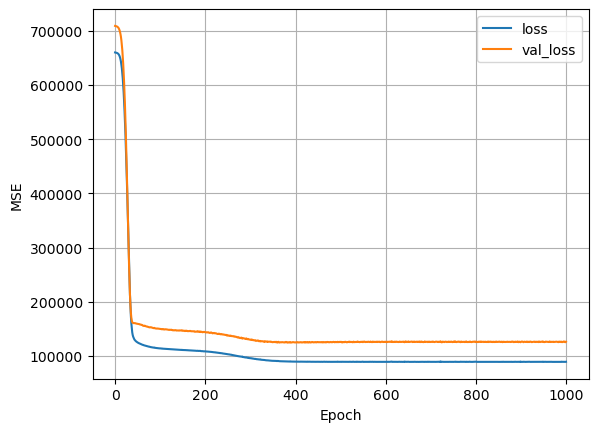

In [28]:
plot_history(history)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


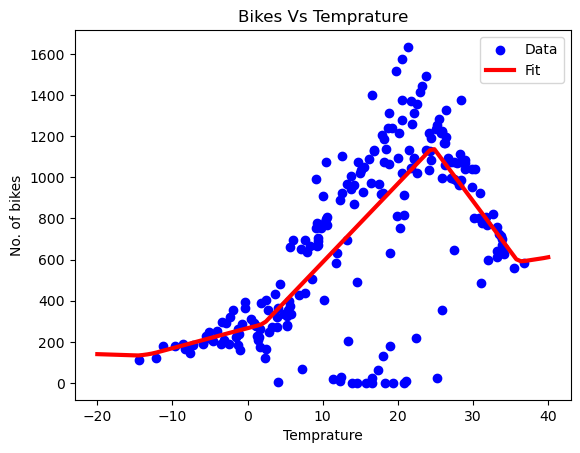

In [29]:
plt.scatter(X_train_temp ,y_train_temp , label ="Data" , color ="blue")
x = tf.linspace(-20 , 40 ,100)
plt.plot(x , nn_model.predict(np.array(x).reshape(-1,1)) , label ="Fit", color ="red" , linewidth=3)
plt.legend()
plt.title("Bikes Vs Temprature")
plt.xlabel("Temprature")
plt.ylabel("No. of bikes")
plt.show()

In [30]:
input_shape = (6,)
all_normalizer = tf.keras.layers.Normalization( axis=-1)
all_normalizer.adapt(X_train_all)

In [31]:
nn_model = tf.keras.models.Sequential([
    all_normalizer,
    tf.keras.layers.Dense(32 , activation = 'relu'),
    tf.keras.layers.Dense(32 , activation = 'relu'),
    tf.keras.layers.Dense(1 ),
])
nn_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), loss = 'mean_squared_error')

In [32]:
history = nn_model.fit(
    X_train_all , y_train_all,
    verbose =0 ,
    epochs =1000,
    validation_data = (X_val_all , y_val_all)
)

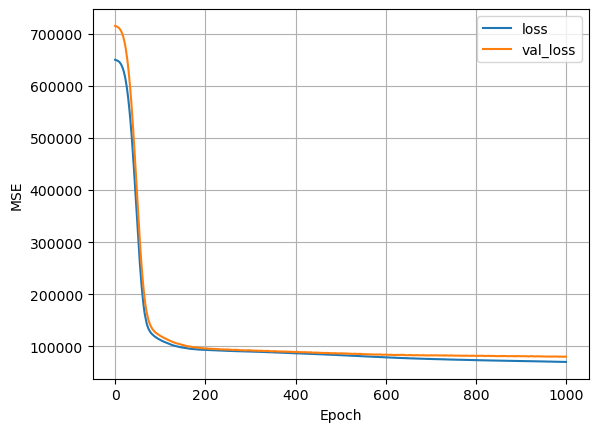

In [33]:
plot_history(history)

In [34]:
y_pred_lr = all_reg.predict(X_test_all)
y_pred_nn = nn_model.predict(X_test_all)

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/stepWARNING:tensorflow:6 out of the last 11 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x00000175D41BD1C0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [35]:
def MSE(y_pred , y_real):
    return (np.square(y_pred-y_real)).mean()

In [36]:
MSE (y_pred_lr , y_test_all)

114363.13594072573

In [37]:
MSE (y_pred_nn , y_test_all)

91032.10666974277

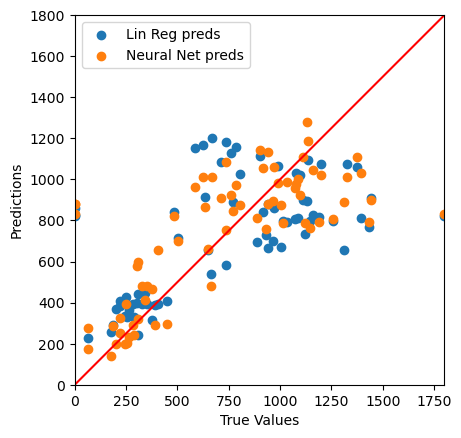

In [38]:
ax = plt.axes(aspect = "equal")
plt.scatter(y_test_all , y_pred_lr ,label = "Lin Reg preds")
plt.scatter(y_test_all , y_pred_nn ,label = "Neural Net preds")
plt.xlabel("True Values")
plt.ylabel("Predictions")
lims = [0 , 1800]
plt.legend()
plt.xlim(lims)
plt.ylim(lims)
_=plt.plot(lims , lims , c="red")